In [ ]:
## Parte 2: Aplicaciones en Python

In [105]:
### 2.1.1 Recibir el path de un archivo de imagen png y conversión de la imagen en una matriz de numpy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

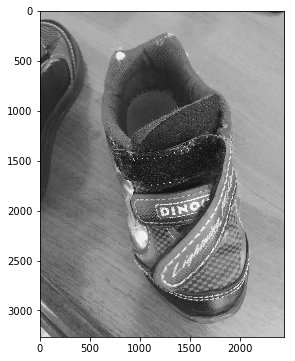

In [106]:
img = Image.open('zapato.png')
imggray = img.convert('LA')
plt.figure(figsize=(6, 6))
plt.imshow(imggray);

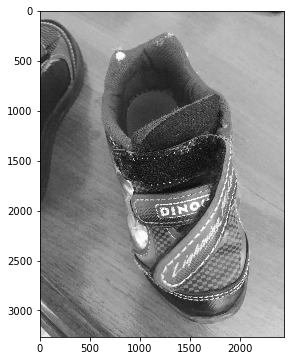

In [107]:

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(6,6))
plt.imshow(imgmat, cmap='gray');

In [108]:
### 2.1.2 Realizar y verificar la descomposición SVD
U, sigma, VT = np.linalg.svd(imgmat)

In [109]:
imgmat

matrix([[ 169.,  165.,  167., ...,  114.,  124.,  131.],
        [ 169.,  167.,  169., ...,  114.,  125.,  127.],
        [ 170.,  169.,  170., ...,  120.,  127.,  127.],
        ..., 
        [ 198.,  198.,  198., ...,  191.,  194.,  197.],
        [ 198.,  197.,  197., ...,  196.,  194.,  196.],
        [ 197.,  197.,  197., ...,  199.,  196.,  197.]])

In [110]:
imgmat.shape



(3264, 2448)

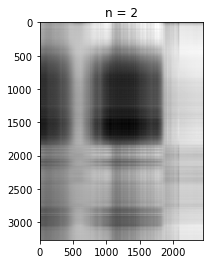

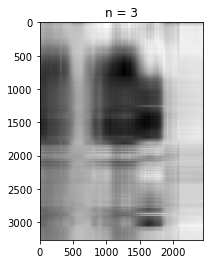

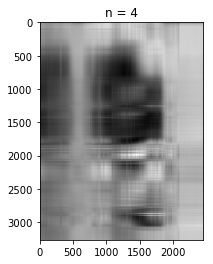

In [111]:
### 2.1.3 Aproximación de la imagen (utilizando únicamente tres vectores)
for i in range(2, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()


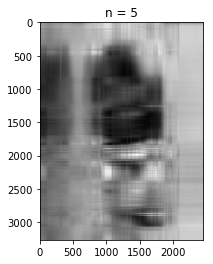

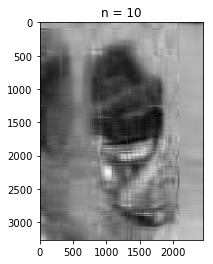

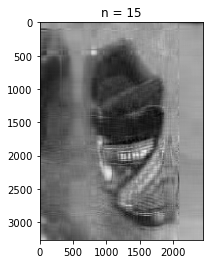

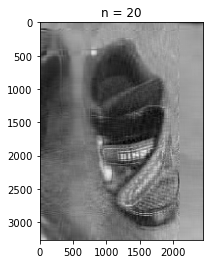

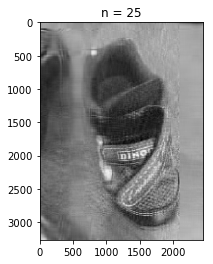

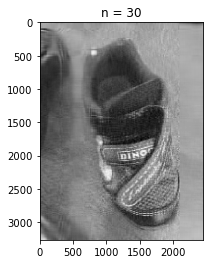

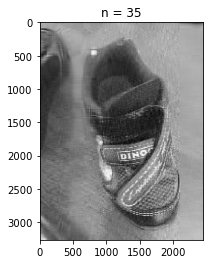

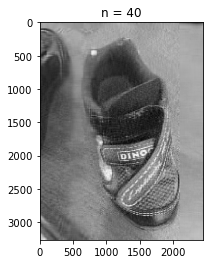

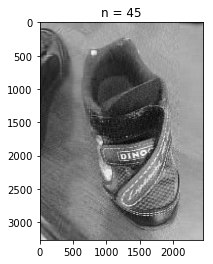

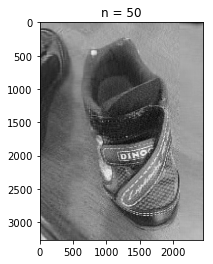

In [112]:
### 2.1.4 Aproximación de la imagen utilizando los primeros 50 vectores de la SVD
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [113]:
### 2.1.5 ¿Qué tiene que ver este proyecto con compresión de imágenes?
"""
En un sentido la compresión de imagenes se relaciona con eliminar la información redundante dentro de una matriz.  
Es decir, se reduce la cantidad de información utilizada para describir la imagen al eliminar de la matriz la 
información que no agrega un valor significativo.  """

'\nEn un sentido la compresión de imagenes se relaciona con eliminar la información redundante dentro de una matriz.  \nEs decir, se reduce la cantidad de información utilizada para describir la imagen al eliminar de la matriz la \ninformación que no agrega un valor significativo.  '

In [114]:
## 2.2.1 Aplicaciónde la pseudoinversa y sistemas de ecuaciones

In [164]:
##Obteniendo b directamente con las funciones de numpy
import numpy as np
A = [[1,1],[0,0]]
U, sigma, VT = np.linalg.svd(A)
b = np.linalg.pinv(A)

print ("A ")
print(A)

print ("U ")
print (U)

print("sigma")
print(sigma)

print("VT")
print(VT)

print("b a través de la función de numpy")
print(b)

A 
[[1, 1], [0, 0]]
U 
[[ 1.  0.]
 [ 0.  1.]]
sigma
[ 1.41  0.  ]
VT
[[ 0.71  0.71]
 [-0.71  0.71]]
b a través de la función de numpy
[[ 0.5  0. ]
 [ 0.5  0. ]]


In [165]:
## Programando una función que dada cualquier matriz devuelva la pseudoinversa usando la descomposición SVD

def safeDiv(left, right):
    with np.errstate(divide='ignore',invalid='ignore'):
        x = np.divide(left, right)
        if isinstance(x, np.ndarray):
       
            x[np.isinf(x)] = 0
            x[np.isnan(x)] = 0
            
        elif np.isinf(x) or np.isnan(x):
               x = 0
    return x

sigmat = np.transpose(safeDiv(1,sigma))

V = np.transpose(VT)
UT = np.transpose(U)

bsvd = np.multiply(V,sigmat,UT)

print("generando la pseudoinversa")
print(bsvd)

generando la pseudoinversa
[[ 0.5 -0. ]
 [ 0.5  0. ]]


In [ ]:
## 2.2.2 Diferentes valores de b para el sistema Ax = b

In [195]:
A = [[1,1],[0,0]]
b = [1,1]

AMAS = np.linalg.pinv(A)
Z = np.multiply(AMAS, b)

print(b)
print(Z)

[1, 1]
[[ 0.5  0. ]
 [ 0.5  0. ]]


In [196]:
A = [[1,1],[0,0]]
b = [2,2]

AMAS = np.linalg.pinv(A)

Z = np.multiply(AMAS, b)

print(b)
print(Z)

[2, 2]
[[ 1.  0.]
 [ 1.  0.]]


In [197]:
A = [[1,1],[0,0]]
b = [3,3]

AMAS = np.linalg.pinv(A)

Z = np.multiply(AMAS, b)

print(b)
print(Z)

[3, 3]
[[ 1.5  0. ]
 [ 1.5  0. ]]


In [198]:
A = [[1,1],[0,1e-32]]
b = [1,1]

AMAS = np.linalg.pinv(A)

Z = np.multiply(AMAS, b)

print(b)
print(Z)

[1, 1]
[[  5.00e-01   2.50e-33]
 [  5.00e-01   2.50e-33]]


In [199]:
A = [[1,1],[0,1e-32]]
b = [2,2]

AMAS = np.linalg.pinv(A)

Z = np.multiply(AMAS, b)

print(b)
print(Z)

[2, 2]
[[  1.00e+00   5.00e-33]
 [  1.00e+00   5.00e-33]]


In [200]:
A = [[1,1],[0,1e-32]]
b = [3,3]

AMAS = np.linalg.pinv(A)

Z = np.multiply(AMAS, b)

print(b)
print(Z)

[3, 3]
[[  1.50e+00   7.50e-33]
 [  1.50e+00   7.50e-33]]


In [202]:
##EJERCICIO ----
import numpy as np
A = [[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]]
U, sigma, VT = np.linalg.svd(A)
b = np.linalg.pinv(A)

print ("A ")
print(A)

print ("U ")
print (U)

print("sigma")
print(sigma)

print("VT")
print(VT)

print("b a través de la función de numpy")
print(b)

A 
[[1, 0, 0, 0, 2], [0, 0, 3, 0, 0], [0, 0, 0, 0, 0], [0, 2, 0, 0, 0]]
U 
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
sigma
[ 3.    2.24  2.    0.  ]
VT
[[-0.    0.    1.    0.    0.  ]
 [ 0.45  0.    0.    0.    0.89]
 [-0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.  ]
 [-0.89  0.    0.    0.    0.45]]
b a través de la función de numpy
[[ 0.2   0.    0.    0.  ]
 [ 0.    0.    0.    0.5 ]
 [ 0.    0.33  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.4   0.    0.    0.  ]]


In [203]:
np.diag(sigma)

array([[ 3.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  2.24,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  2.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

In [209]:
import numpy as np
A = [[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]]
U, sigma, VT = np.linalg.svd(A)
b = np.linalg.pinv(A)

def safeDiv(left, right):
    with np.errstate(divide='ignore',invalid='ignore'):
        x = np.divide(left, right)
        if isinstance(x, np.ndarray):
       
            x[np.isinf(x)] = 0
            x[np.isnan(x)] = 0
            
        elif np.isinf(x) or np.isnan(x):
               x = 0
    return x

sigmat = np.transpose(safeDiv(1,sigma))

sigmatd = np.diag(safeDiv(1,sigma))

#sigmatd = np.transpose(sigmatd)

#V = np.transpose(VT)
#UT = np.transpose(U)

#bsvd = np.multiply(V,sigmatd,UT)

print("generando la pseudoinversa")
print(sigmatd)

generando la pseudoinversa
[[ 0.33  0.    0.    0.  ]
 [ 0.    0.45  0.    0.  ]
 [ 0.    0.    0.5   0.  ]
 [ 0.    0.    0.    0.  ]]
